# Compare the LSST magnitudes I calculate to those from TRILEGAL

Should I use Kurucz atmospheres?

https://www.hs.uni-hamburg.de/DE/Ins/Per/Czesla/PyA/PyA/pyaslDoc/resBasedDoc/kuruczModels.html

https://pysynphot.readthedocs.io/en/latest/spectrum.html

In [65]:
import sys
sys.path.insert(0, '/Users/ageller/WORK/LSST/onGitHub/EBLSST/code')
from EBLSST import LSSTEBworker, SED
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
%matplotlib notebook

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


*Read in a TRILEGAL field*

In [2]:
filename = '/Users/ageller/WORK/LSST/onGitHub/EBLSST/input/TRILEGAL/grid/trilegal.grid.id1.0.h5'
df = pd.read_hdf(filename)
#dist = 10.**(df['m-M0'].values/5.) * 10.# *u.parsec

dist = 10.**( (df['m-M0'].values + 5)/5.) #pc
logDist = np.log10(dist/1000.) #log(d [kpc])
logR = 2.*(0.25*df['logL'] - df['logTe'] + 3.762) #taken from my N-body notes to get logT <-- from Jarrod Hurley

df['logR'] = logR
df['logDist'] = logDist

print(df)

        Gc  logAge  [M/H]     m_ini   logL  logTe   logg  m-M0     Av  m2/m1  \
0        1    6.65   0.27   0.51311 -1.374  3.592  4.837   7.2  0.347    0.0   
1        1    6.71  -0.19   0.13318 -1.740  3.509  4.285   8.0  0.458    0.0   
2        1    6.71  -0.09   0.74550 -0.736  3.671  4.676   8.2  0.371    0.0   
3        1    6.87  -0.07   1.62066  0.870  3.896  4.307   9.7  0.568    0.0   
4        1    6.87   0.07   0.74828 -0.767  3.661  4.668   8.8  0.431    0.0   
5        1    6.87   0.27   1.31862  0.403  3.806  4.326  12.8  0.432    0.0   
6        1    7.07   0.23   0.11043 -1.914  3.482  4.269   4.4  0.112    0.0   
7        1    7.15  -0.17   0.78918 -0.596  3.693  4.650   7.6  0.372    0.0   
8        1    7.15  -0.09   0.80570 -0.582  3.693  4.642  10.3  0.457    0.0   
9        1    7.17   0.13  14.01946  4.484  4.395  3.626   9.3  0.483    0.0   
10       1    7.21   0.17   0.22026 -2.181  3.536  5.052   7.1  0.346    0.0   
11       1    7.25   0.01   0.35666 -1.7

*Create an EB in my code*

In [69]:
worker = LSSTEBworker()
worker.filterFilesRoot = '/Users/ageller/WORK/LSST/onGitHub/EBLSST/input/filters/'
worker.initialize()

diff = {}
diff['mbol'] = []
diff['Teff'] = []
diff['MH'] = []
diff['Av'] = []
diff['u'] = []
diff['g'] = []
diff['r'] = []
diff['i'] = []
diff['z'] = []
diff['y'] = []
for i in range(100):
    print(i)
    L1 = 10.**df['logL'][i]
    L2 = 1e-20
    r1 = 10.**df['logR'][i]
    r2 = 1e-20
    dist = 10.**df['logDist'][i]
    Av = df['Av'][i]
    line = [1., 1., 1., 0., r1, r2, L1, L2, 1., 1., 1., dist, 0., 0., Av]
    EB = worker.getEB(line, i)

#     print(EB.T1, 10.**df['logTe'][i])
#     print(EB.Mbol, df['mbol'][i] - df['m-M0'][i])

#     print(EB.appMagMean)
#     print(dfmags.iloc[i])
    
    diff['mbol'].append(df.iloc[i]['mbol'])
    diff['Teff'].append(EB.T1)
    diff['Av'].append(df.iloc[i]['Av'])
    diff['MH'].append(df.iloc[i]['[M/H]'])
    diff['u'].append(df.iloc[i]['u_mag'] - EB.appMagMean['u_'])
    diff['g'].append(df.iloc[i]['g_mag'] - EB.appMagMean['g_'])
    diff['r'].append(df.iloc[i]['r_mag'] - EB.appMagMean['r_'])
    diff['i'].append(df.iloc[i]['i_mag'] - EB.appMagMean['i_'])
    diff['z'].append(df.iloc[i]['z_mag'] - EB.appMagMean['z_'])
    diff['y'].append(df.iloc[i]['Y_mag'] - EB.appMagMean['y_'])
    #print(10.**df.iloc[i]['logTe'])
    print(df.iloc[i]['u_mag'] - EB.appMagMean['u_'],\
          df.iloc[i]['g_mag'] - EB.appMagMean['g_'],\
          df.iloc[i]['r_mag'] - EB.appMagMean['r_'],\
          df.iloc[i]['i_mag'] - EB.appMagMean['i_'],\
          df.iloc[i]['z_mag'] - EB.appMagMean['z_'],\
          df.iloc[i]['Y_mag'] - EB.appMagMean['y_'])
#     print(diff)
#     raise


0
359.5 20.38073425120644 0.5416894835802565 3908.4089579240213
478.5 18.41160493922395 0.4132816949264433 3908.4089579240213
621.5 17.236896665064695 0.28585678997339675 3908.4089579240213
754.5 16.655889581552458 0.2084911599818023 3908.4089579240213
869.5 16.359403430454076 0.16151841416228294 3908.4089579240213
959.5 16.17646688783641 0.13454504079608906 3908.4089579240213
-0.16773425120643992 -0.7836049392239488 -0.833896665064696 -1.0548895815524588 -1.1744034304540758 -1.2084668878364084
1
359.5 23.733808505553945 0.7149676757341713 3228.4941217126348
478.5 21.132614298419682 0.5454841967617032 3228.4941217126348
621.5 19.555303175794432 0.37729801097353227 3228.4941217126348
754.5 18.724812951480803 0.27518429761286867 3228.4941217126348
869.5 18.271373031552944 0.21318568785684602 3228.4941217126348
959.5 17.957906240371457 0.17758394433604835 3228.4941217126348
0.09219149444605534 -0.6386142984196823 -0.5803031757944304 -1.0648129514808033 -1.279373031552943 -1.26390624037145

959.5 17.39503582128189 0.14462622540905248 3090.295432513592
0.04406081392165362 -0.5257233971685551 -0.371332996723595 -1.0223121749133242 -1.3107621893507435 -1.314035821281891
17
359.5 18.32913625813284 0.7102844813516331 5345.643593969719
478.5 17.066729620259537 0.541911156171561 5345.643593969719
621.5 16.328513545509537 0.3748266266221773 5345.643593969719
754.5 16.009477400653278 0.27338178037959665 5345.643593969719
869.5 15.875524474957432 0.2117892750542903 5345.643593969719
959.5 15.832547102476122 0.1764207307268603 5345.643593969719
-0.6141362581328416 -1.2607296202595375 -1.272513545509538 -1.2024774006532777 -1.186524474957432 -1.211547102476123
18
359.5 11.192655146958625 0.377777680191418 7780.365510398041
478.5 10.628212326311434 0.28822527427146766 7780.365510398041
621.5 10.377311402824704 0.19935833767597122 7780.365510398041
754.5 10.34021094317273 0.14540305681727997 7780.365510398041
869.5 10.376880896907236 0.11264396607283131 7780.365510398041
959.5 10.46625

478.5 20.082608233395455 0.458540209068244 3775.721909254156
621.5 18.832822325408188 0.31716099175722695 3775.721909254156
754.5 18.205766858499235 0.23132304493658176 3775.721909254156
869.5 17.880556366250406 0.17920630966132256 3775.721909254156
959.5 17.674596315790193 0.14927907984580485 3775.721909254156
-0.22313997773479244 -0.8776082333954562 -0.9828223254081863 -1.1287668584992332 -1.2155563662504072 -1.216596315790195
34
359.5 15.546853042681537 0.6228648528775859 6165.9500186148225
478.5 14.571290713459218 0.47521439848890734 6165.9500186148225
621.5 14.02813966561461 0.328694118730217 6165.9500186148225
754.5 13.82298568096579 0.23973479202518472 6165.9500186148225
869.5 13.758313002042469 0.18572290273991607 6165.9500186148225
959.5 13.770369642467712 0.15470741002201593 6165.9500186148225
-1.0958530426815383 -1.3352907134592193 -1.2411396656146092 -1.1809856809657884 -1.1693130020424682 -1.210369642467711
35
359.5 10.556486189552105 0.4698805030480034 13614.446824659482


478.5 17.78844024020054 0.5812146026631249 4497.798548932879
621.5 16.792341578772685 0.40201185448708243 4497.798548932879
754.5 16.319881131693727 0.29320946994558933 4497.798548932879
869.5 16.091547229302588 0.22714981588240363 4497.798548932879
959.5 15.971244099668764 0.18921608042792926 4497.798548932879
-0.0643397178003724 -1.0234402402005394 -1.1573415787726855 -1.123881131693727 -1.1285472293025887 -1.151244099668764
51
359.5 22.877444280962322 0.7102844813516331 3639.1503612720708
478.5 20.66115824481012 0.541911156171561 3639.1503612720708
621.5 19.31844297199017 0.3748266266221773 3639.1503612720708
754.5 18.634260929256758 0.27338178037959665 3639.1503612720708
869.5 18.273445457771995 0.2117892750542903 3639.1503612720708
959.5 18.03971825844283 0.1764207307268603 3639.1503612720708
-0.0844442809623196 -0.7891582448101211 -0.8454429719901704 -1.0912609292567588 -1.2214454577719955 -1.2197182584428283
52
359.5 18.808777203019766 0.7774102675013479 5011.872336272725
478.5 

359.5 21.483893006323125 0.43085388319351814 3605.7864302164235
478.5 19.305978628261418 0.3287197342930788 3605.7864302164235
621.5 18.011857475812224 0.2273673603246614 3605.7864302164235
754.5 17.356968389789778 0.16583158546103005 3605.7864302164235
869.5 17.013690796730746 0.12846997783512995 3605.7864302164235
959.5 16.788144485606548 0.10701565204530426 3605.7864302164235
-0.06189300632312822 -0.7749786282614188 -0.8298574758122221 -1.1019683897897785 -1.2336907967307464 -1.2281444856065473
68
359.5 19.793330922257972 0.566666520287127 4139.9967481973
478.5 17.974538220083392 0.43233791140720146 4139.9967481973
621.5 16.891843499258716 0.29903750651395683 4139.9967481973
754.5 16.367077662872912 0.21810458522591994 4139.9967481973
869.5 16.105819521179264 0.16896594910924698 4139.9967481973
959.5 15.95331163707811 0.14074884671175886 4139.9967481973
-0.2203309222579719 -0.960538220083393 -1.0908434992587175 -1.109077662872913 -1.1378195211792637 -1.1523116370781121
69
359.5 12.1

959.5 16.756545489817626 0.194256672734411 8892.01117857949
-0.8715493959255056 -1.5193862542423648 -1.268431445125925 -1.1387134944223032 -1.1108301717768505 -1.2195454898176248
84
359.5 23.19419340898513 0.6884295742331213 3706.80721782576
478.5 21.038032566647534 0.5252369667508977 3706.80721782576
621.5 19.734334529768137 0.3632934996491872 3706.80721782576
754.5 19.074221508582802 0.26497003329099367 3706.80721782576
869.5 18.72849349854081 0.20527268197569673 3706.80721782576
959.5 18.507137934528703 0.17099240055064918 3706.80721782576
-0.15519340898512723 -0.8190325666475324 -0.8873345297681361 -1.1012215085828032 -1.2204934985408116 -1.223137934528701
85
359.5 18.499459638183318 0.7805323970897067 6266.13864672335
478.5 17.514050976614044 0.5955067650236935 6266.13864672335
621.5 16.951986286440068 0.4118973918925025 6266.13864672335
754.5 16.734757309195 0.3004195388786776 6266.13864672335
869.5 16.662733781477545 0.23273546709262669 6266.13864672335
959.5 16.672104899473393 

<IPython.core.display.Javascript object>


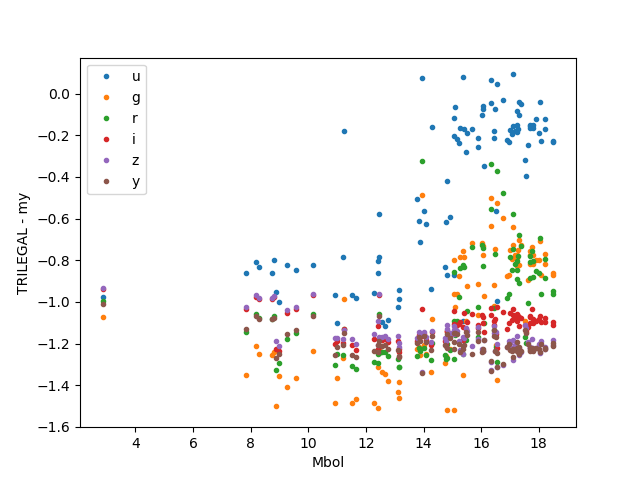

<IPython.core.display.Javascript object>


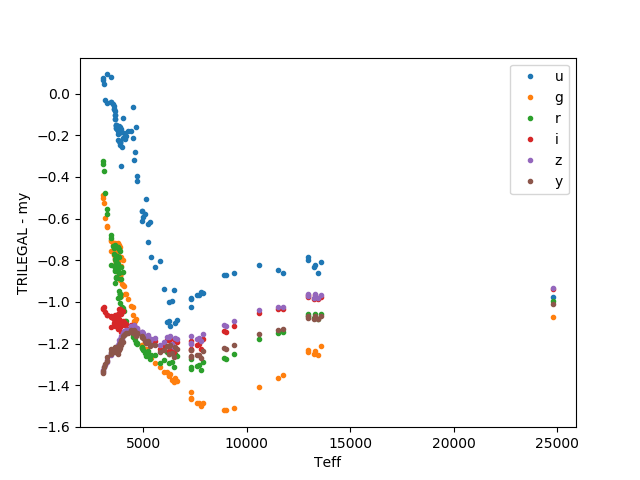

<IPython.core.display.Javascript object>


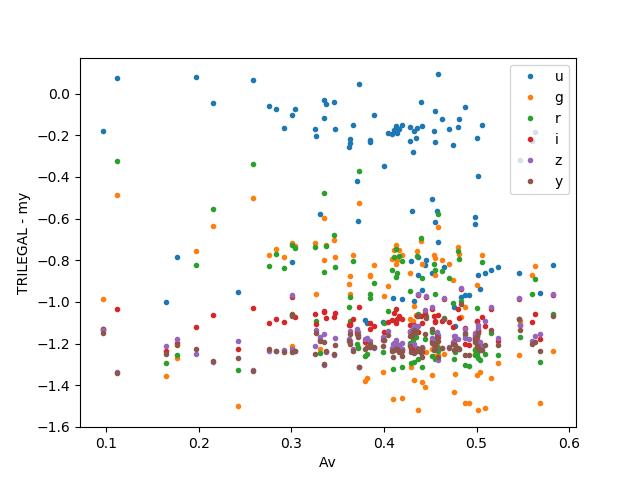

<IPython.core.display.Javascript object>


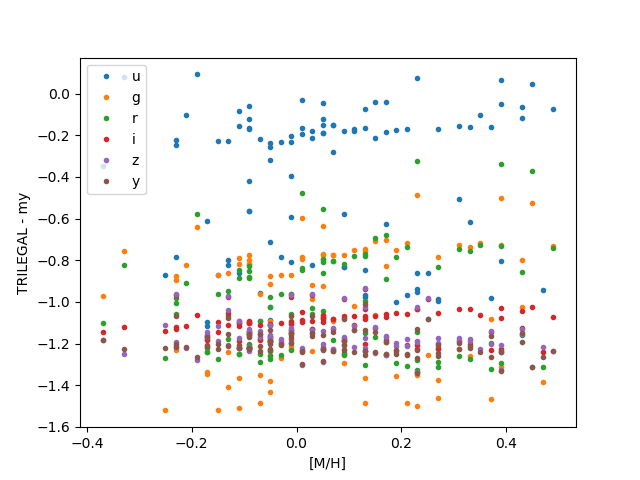

In [70]:
f, ax = plt.subplots()
ax.plot(diff['mbol'], diff['u'],'.', label='u')
ax.plot(diff['mbol'], diff['g'],'.', label='g')
ax.plot(diff['mbol'], diff['r'],'.', label='r')
ax.plot(diff['mbol'], diff['i'],'.', label='i')
ax.plot(diff['mbol'], diff['z'],'.', label='z')
ax.plot(diff['mbol'], diff['y'],'.', label='y')
ax.set_xlabel('Mbol')
ax.set_ylabel('TRILEGAL - my')
ax.legend()

f, ax = plt.subplots()
ax.plot(diff['Teff'], diff['u'],'.', label='u')
ax.plot(diff['Teff'], diff['g'],'.', label='g')
ax.plot(diff['Teff'], diff['r'],'.', label='r')
ax.plot(diff['Teff'], diff['i'],'.', label='i')
ax.plot(diff['Teff'], diff['z'],'.', label='z')
ax.plot(diff['Teff'], diff['y'],'.', label='y')
ax.set_xlabel('Teff')
ax.set_ylabel('TRILEGAL - my')
ax.legend()


f, ax = plt.subplots()
ax.plot(diff['Av'], diff['u'],'.', label='u')
ax.plot(diff['Av'], diff['g'],'.', label='g')
ax.plot(diff['Av'], diff['r'],'.', label='r')
ax.plot(diff['Av'], diff['i'],'.', label='i')
ax.plot(diff['Av'], diff['z'],'.', label='z')
ax.plot(diff['Av'], diff['y'],'.', label='y')
ax.set_xlabel('Av')
ax.set_ylabel('TRILEGAL - my')
ax.legend()

f, ax = plt.subplots()
ax.plot(diff['MH'], diff['u'],'.', label='u')
ax.plot(diff['MH'], diff['g'],'.', label='g')
ax.plot(diff['MH'], diff['r'],'.', label='r')
ax.plot(diff['MH'], diff['i'],'.', label='i')
ax.plot(diff['MH'], diff['z'],'.', label='z')
ax.plot(diff['MH'], diff['y'],'.', label='y')
ax.set_xlabel('[M/H]')
ax.set_ylabel('TRILEGAL - my')
ax.legend()

0


<IPython.core.display.Javascript object>


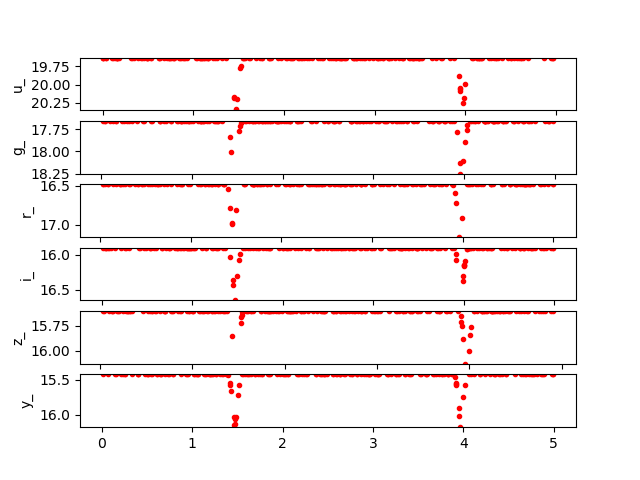

In [86]:
i=0

print(i)
L1 = 10.**df['logL'][i]
L2 = L1
r1 = 10.**df['logR'][i]
r2 = r1
dist = 10.**df['logDist'][i]
Av = df['Av'][i]
line = [1., 1., 1., 0., r1, r2, L1, L2, 1., 1., 1., dist, 0., 0., Av]
EB = worker.getEB(line, i)

f,ax = plt.subplots(6,1)
for i,f in enumerate(worker.filters):
    EB.observe(f)

    ax[i].plot((EB.obsDates[f] % EB.period), EB.appMag[f],'.', color='red')
    ax[i].set_ylim(max(EB.appMag[f]), min(EB.appMag[f]))
    ax[i].set_ylabel(f)


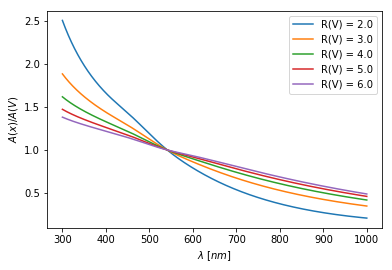

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u

from dust_extinction.parameter_averages import F04

fig, ax = plt.subplots()

# temp model to get the correct x range
text_model = F04()

# generate the curves and plot them
# x = np.arange(text_model.x_range[0],
#               text_model.x_range[1],0.1)/u.micron

x = np.arange(300,1000, 0.1 )*u.nm

Rvs = ['2.0','3.0','4.0','5.0','6.0']
for cur_Rv in Rvs:
    ext_model = F04(Rv=cur_Rv)
    ax.plot(x,ext_model(x),label='R(V) = ' + str(cur_Rv))

ax.set_xlabel('$\lambda$ [$nm$]')
ax.set_ylabel('$A(x)/A(V)$')

ax.legend(loc='best')
plt.show()